In [5]:
import os
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
import tensorflow as tf
import keras
import cv2
import easygui
import imageio

In [6]:
def cartoonify(image_path):
    original_image=cv2.imread(image_path)
    original_image=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
    
    if original_image is None:
        sys.exit("Can not find any image. Choose appropriate file")
    grayscaleimage=cv2.cvtColor(original_image,cv2.COLOR_RGB2GRAY)  
    resized1=cv2.resize(grayscaleimage,(960,540))
    
    smoothgrayscale=cv2.medianBlur(grayscaleimage,5)
    resized2=cv2.resize(smoothgrayscale,(960,540))
    
    colorimage=cv2.bilateralFilter(original_image,9,300,300)
    resized3=cv2.resize(colorimage,(960,540))
    
    getEdge = cv2.adaptiveThreshold(smoothgrayscale, 255, 
    cv2.ADAPTIVE_THRESH_MEAN_C, 
    cv2.THRESH_BINARY, 9, 9)
    cartonimage=cv2.bitwise_and(colorimage,colorimage,mask=getEdge)
    resized4=cv2.resize(cartonimage,(960,540))    
    
    images=[resized1,resized2,resized3,resized4]
    fig,axes=plt.subplots(2,2,figsize=(8,8))
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
    
    plt.show()
    
def uploadimage():
    image_path=easygui.fileopenbox()
    cartoonify(image_path)

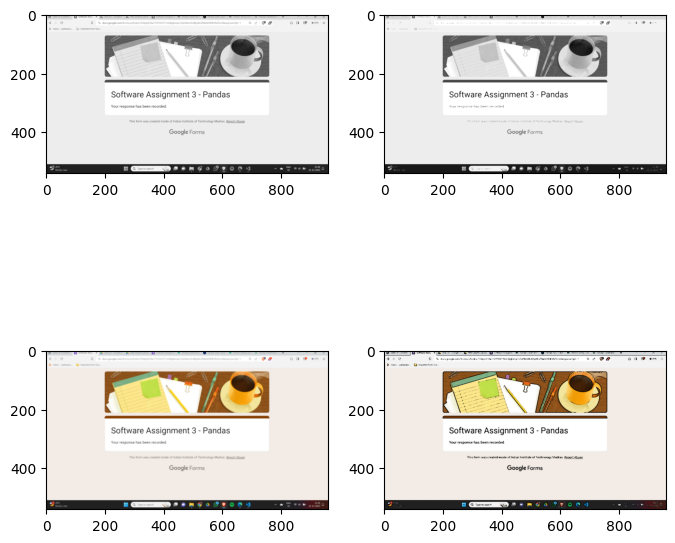

In [7]:
uploadimage()